In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
os.system('sshfs \
erd561@raijin.nci.org.au:/g/data/e14/erd561/R8exp/ \
/Users/earl/Desktop/dipladenia')

0

In [4]:
script_name = nb_name[:-6]
print(script_name)
figures_path = '/Users/earl/Dropbox/CMIP5/figures/'

ctrl_path = '/Users/earl/Desktop/dipladenia/gfdl_nyf_1080/'
hist_path = '/Users/earl/Desktop/dipladenia/gfdl_nyf_1080_hist/year_one/'
rcp85_path = '/Users/earl/Desktop/dipladenia/gfdl_nyf_1080_rcp85/'

p16_get_tau_Q


In [5]:
ocean_tau_x_ctrl = xr.open_dataset(
    ctrl_path + 'ocean_tau_nsh.nc', decode_times=False)['tau_x'][0,:,:]
ocean_tau_y_ctrl = xr.open_dataset(
    ctrl_path + 'ocean_tau_nsh.nc', decode_times=False)['tau_y'][0,:,:]
ocean_nsh_ctrl = xr.open_dataset(
    ctrl_path + 'ocean_tau_nsh.nc', decode_times=False)['net_sfc_heating'][0,:,:]

ocean_tau_x_hist = xr.open_dataset(
    hist_path + 'ocean_month_ncra_tau_nsh.nc', decode_times=False)['tau_x'][0,:,:]
ocean_tau_y_hist = xr.open_dataset(
    hist_path + 'ocean_month_ncra_tau_nsh.nc', decode_times=False)['tau_y'][0,:,:]
ocean_nsh_hist = xr.open_dataset(
    hist_path + 'ocean_month_ncra_tau_nsh.nc', decode_times=False)['net_sfc_heating'][0,:,:]

ocean_tau_x_rcp85 = xr.open_dataset(
    rcp85_path + 'ocean_month_ncra_tau_nsh.nc', decode_times=False)['tau_x'][0,:,:]
ocean_tau_y_rcp85 = xr.open_dataset(
    rcp85_path + 'ocean_month_ncra_tau_nsh.nc', decode_times=False)['tau_y'][0,:,:]
ocean_nsh_rcp85 = xr.open_dataset(
    rcp85_path + 'ocean_month_ncra_tau_nsh.nc', decode_times=False)['net_sfc_heating'][0,:,:]

xt_ocean = xr.open_dataset(
    ctrl_path + 'ocean_tau_nsh.nc', decode_times=False)['xt_ocean'] + 360
yt_ocean = xr.open_dataset(
    ctrl_path + 'ocean_tau_nsh.nc', decode_times=False)['yt_ocean']
xu_ocean = xr.open_dataset(
    ctrl_path + 'ocean_tau_nsh.nc', decode_times=False)['xu_ocean'] + 360
yu_ocean = xr.open_dataset(
    ctrl_path + 'ocean_tau_nsh.nc', decode_times=False)['yu_ocean']



print(np.shape(ocean_tau_x_ctrl))

(1080, 1440)


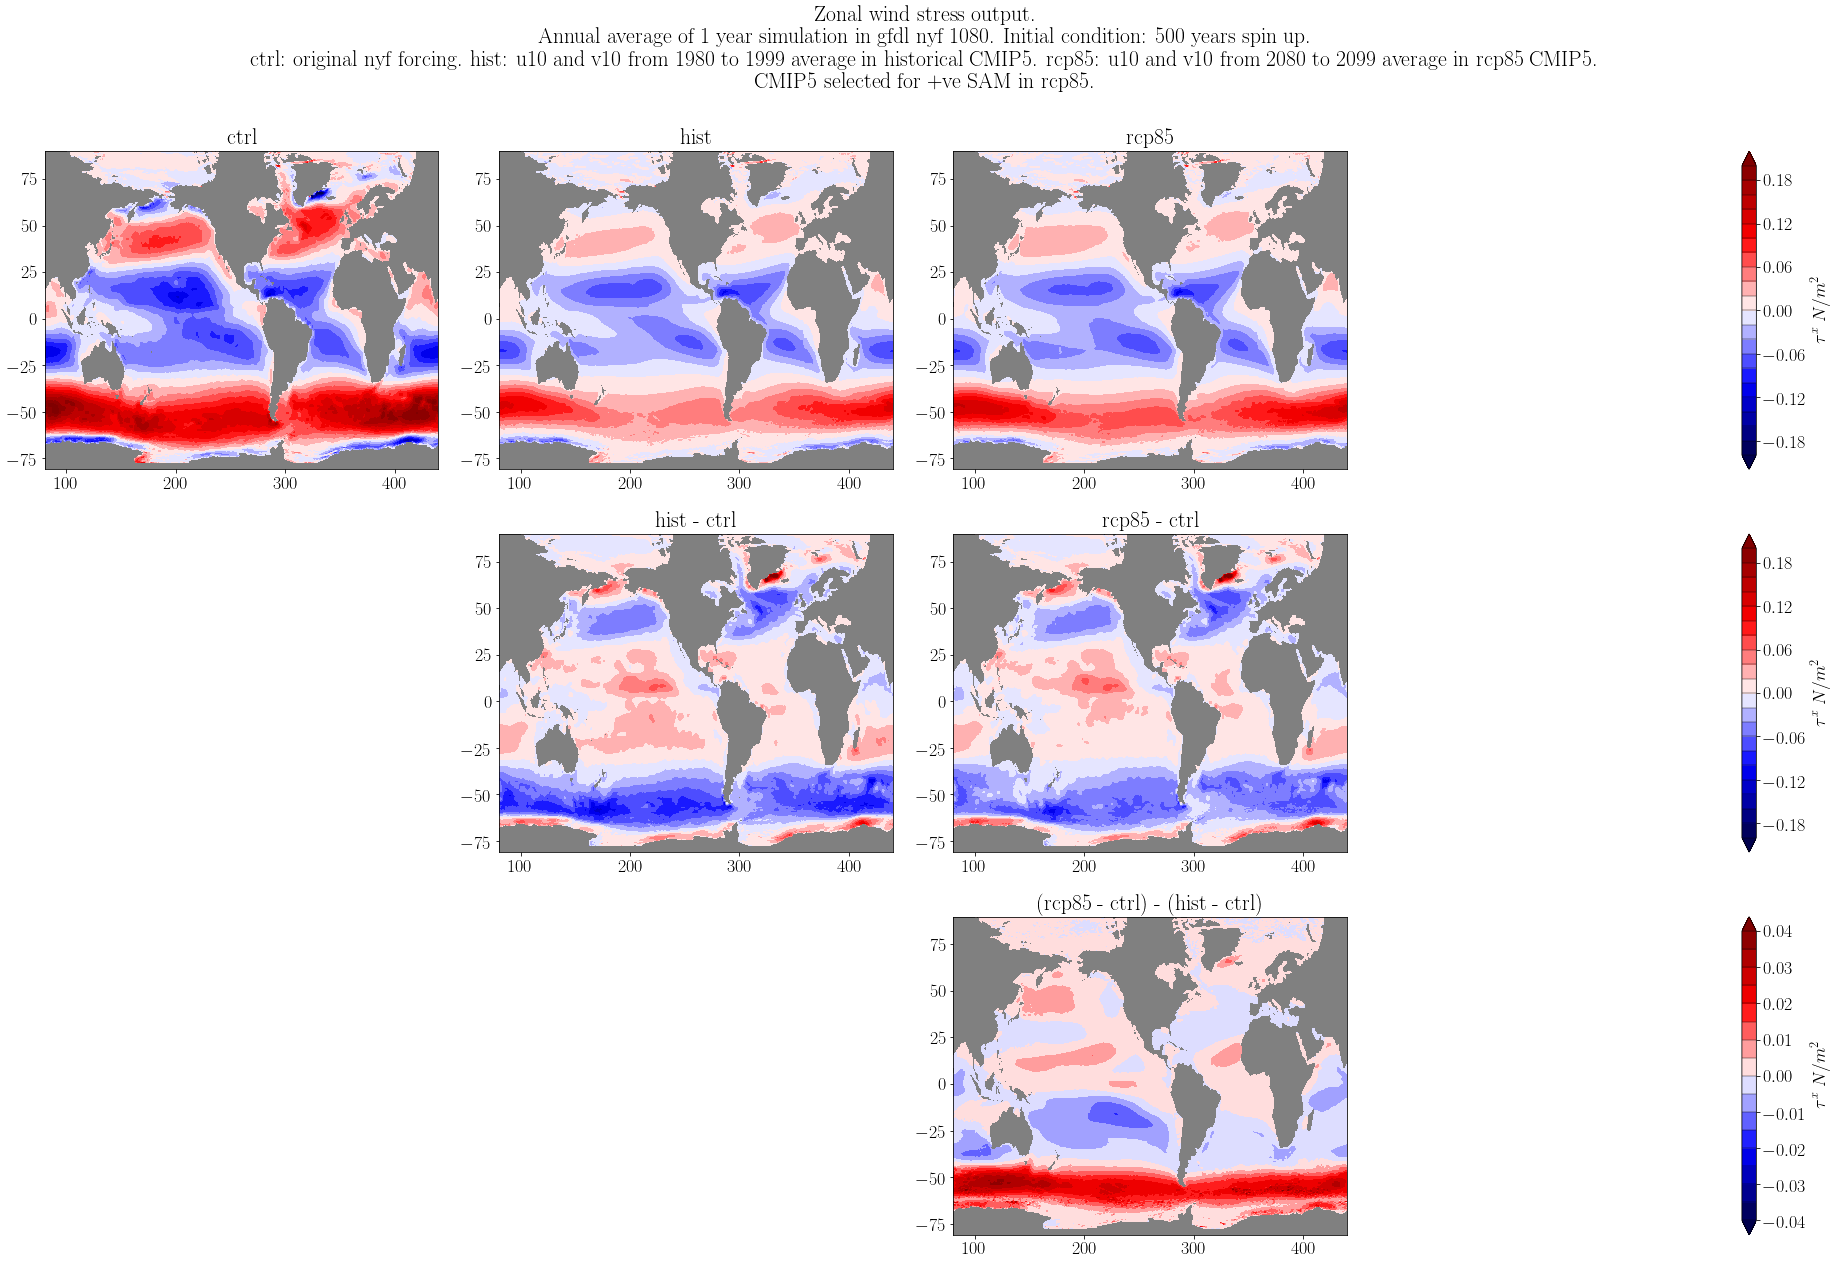

In [6]:
matplotlib.rcParams.update({'font.size': 18}) 
row = 3
col = 4
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(26, 18)

plt.suptitle('Zonal wind stress output.\n'
            + 'Annual average of 1 year simulation in gfdl nyf 1080. Initial condition: 500 years spin up.\n'
            + 'ctrl: original nyf forcing. ' 
            + 'hist: u10 and v10 from 1980 to 1999 average in historical CMIP5. '
            + 'rcp85: u10 and v10 from 2080 to 2099 average in rcp85 CMIP5.\n'
            + 'CMIP5 selected for +ve SAM in rcp85.')

cmap = plt.get_cmap('seismic')
step = 0.02
contf_lvls = np.arange(-0.2,0.2+1e-08,step)  
ax = plt.subplot2grid((row, col), (0, 0))
ax.set_facecolor('grey')
plt.contourf(xt_ocean, yt_ocean, ocean_tau_x_ctrl, contf_lvls, cmap=cmap, extend='both')
ax.set_title('ctrl')
ax = plt.subplot2grid((row, col), (0, 1))
ax.set_facecolor('grey')
plt.contourf(xt_ocean, yt_ocean, ocean_tau_x_hist, contf_lvls, cmap=cmap, extend='both')
ax.set_title('hist')
ax = plt.subplot2grid((row, col), (0, 2))
ax.set_facecolor('grey')
contf = plt.contourf(xt_ocean, yt_ocean, ocean_tau_x_rcp85, contf_lvls, cmap=cmap, extend='both')
ax.set_title('rcp85')
ax = plt.subplot2grid((row, col), (0, 3))
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'$\tau^{x}$ $N/m^{2}$') 
plt.axis('off')

cmap = plt.get_cmap('seismic')
step = 0.02
contf_lvls = np.arange(-0.2,0.2+1e-08,step)  
# ax = plt.subplot2grid((row, col), (1, 0))
# plt.contourf(ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
ax = plt.subplot2grid((row, col), (1, 1))
ax.set_facecolor('grey')
plt.contourf(xt_ocean, yt_ocean, ocean_tau_x_hist - ocean_tau_x_ctrl, contf_lvls, cmap=cmap, extend='both')
ax.set_title('hist - ctrl')
ax = plt.subplot2grid((row, col), (1, 2))
ax.set_facecolor('grey')
contf = plt.contourf(xt_ocean, yt_ocean, ocean_tau_x_rcp85 - ocean_tau_x_ctrl, contf_lvls, cmap=cmap, extend='both')
ax.set_title('rcp85 - ctrl')
ax = plt.subplot2grid((row, col), (1, 3))
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'$\tau^{x}$ $N/m^{2}$') 
plt.axis('off')

cmap = plt.get_cmap('seismic')
step = 0.005
contf_lvls = np.arange(-0.04,0.04+1e-08,step)  
# ax = plt.subplot2grid((row, col), (1, 0))
# plt.contourf(ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
# ax = plt.subplot2grid((row, col), (1, 1))
# plt.contourf(ice_month_hist_ncra_SST - ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
ax = plt.subplot2grid((row, col), (2, 2))
ax.set_facecolor('grey')
contf = plt.contourf(xt_ocean, yt_ocean, 
    (ocean_tau_x_rcp85 - ocean_tau_x_ctrl) - (ocean_tau_x_hist - ocean_tau_x_ctrl), 
    contf_lvls, cmap=cmap, extend='both')
ax.set_title('(rcp85 - ctrl) - (hist - ctrl)')
ax = plt.subplot2grid((row, col), (2, 3))
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'$\tau^{x}$ $N/m^{2}$') 
plt.axis('off')

fig.tight_layout(rect=[0, 0, 1, 0.90])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_' + '.png', bbox_inches='tight', dpi=200)

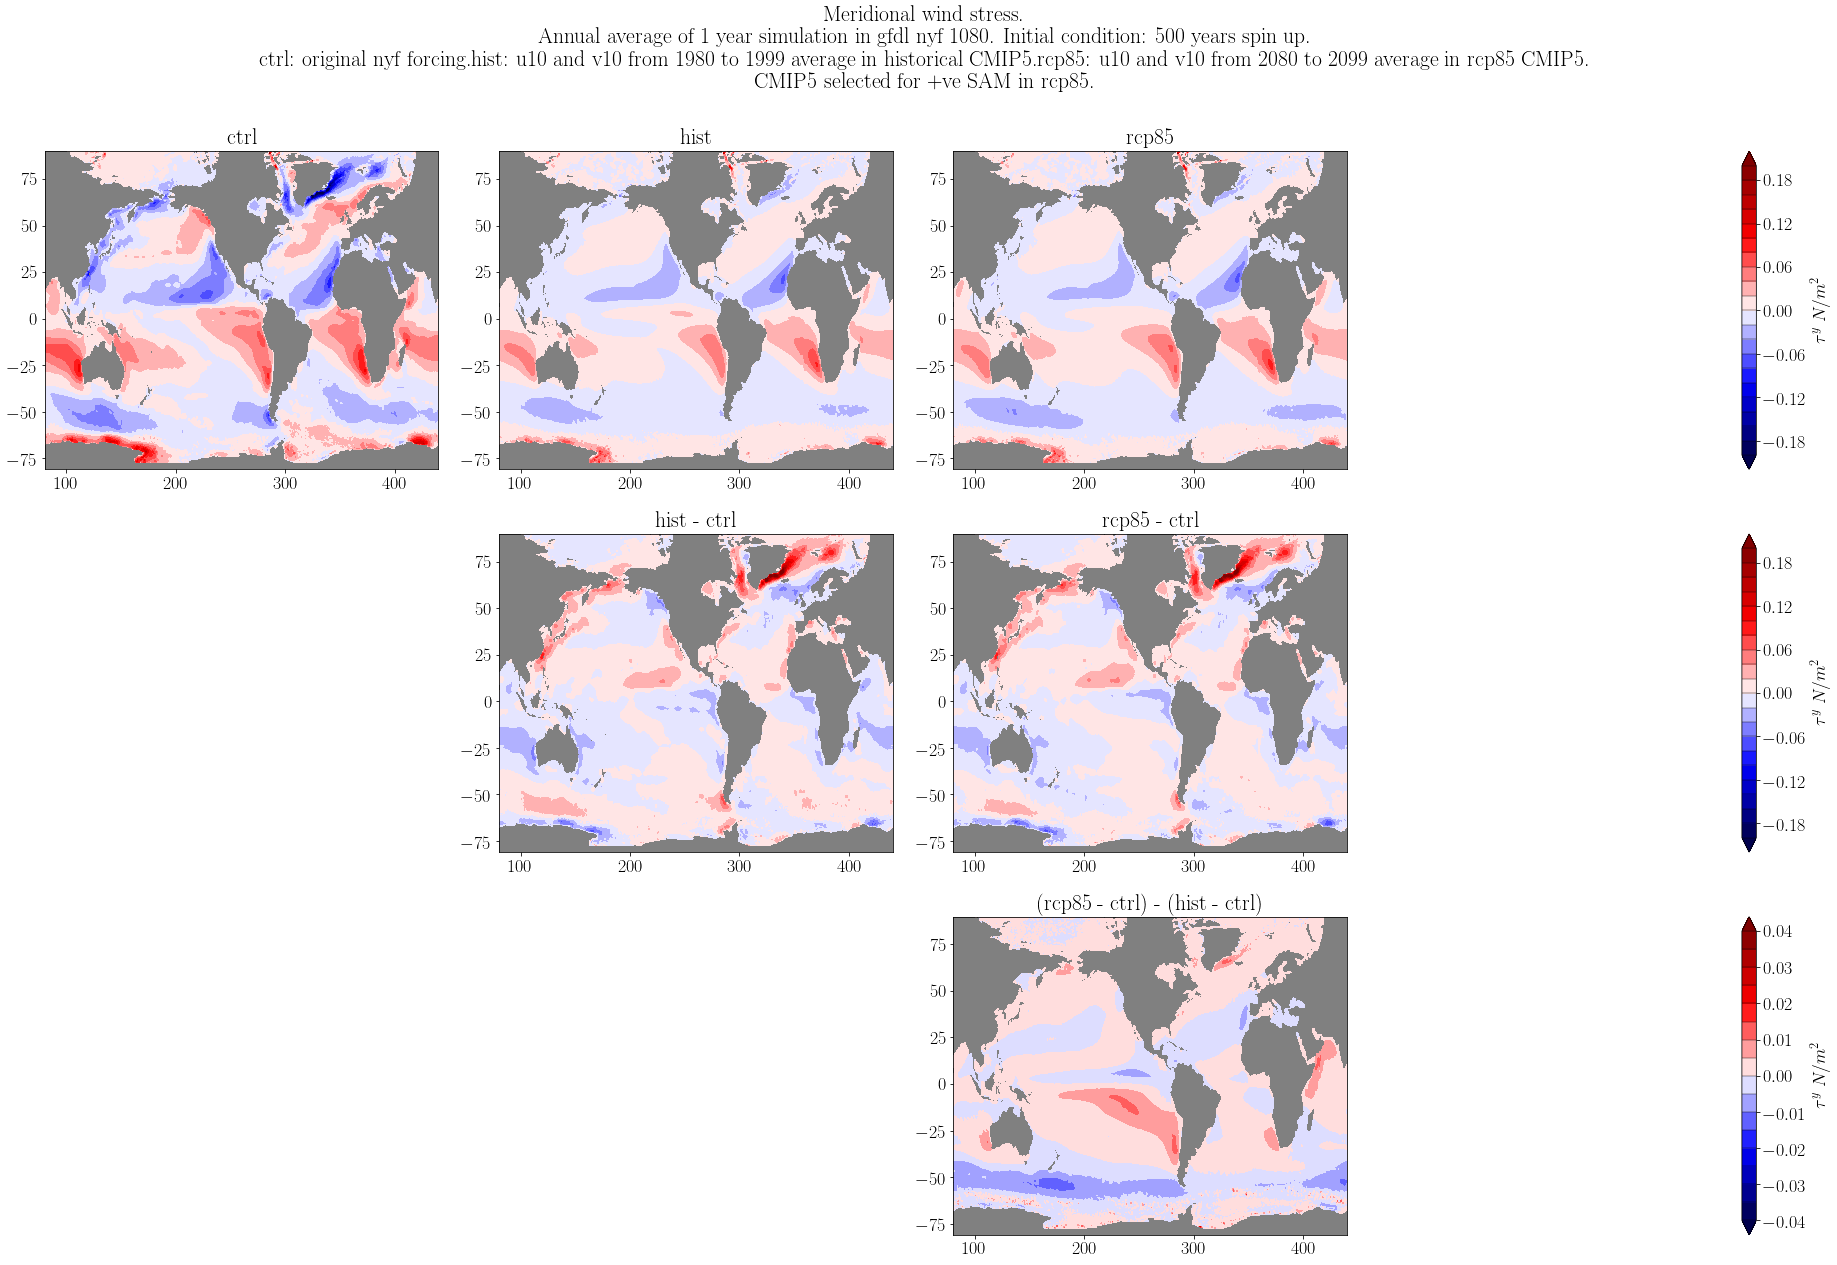

In [47]:
matplotlib.rcParams.update({'font.size': 18}) 
row = 3
col = 4
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(26, 18)

plt.suptitle('Meridional wind stress.\n'
            + 'Annual average of 1 year simulation in gfdl nyf 1080. Initial condition: 500 years spin up.\n'
            + 'ctrl: original nyf forcing.' 
            + 'hist: u10 and v10 from 1980 to 1999 average in historical CMIP5.'
            + 'rcp85: u10 and v10 from 2080 to 2099 average in rcp85 CMIP5.\n'
            + 'CMIP5 selected for +ve SAM in rcp85.')

cmap = plt.get_cmap('seismic')
step = 0.02
contf_lvls = np.arange(-0.2,0.2+1e-08,step)  
ax = plt.subplot2grid((row, col), (0, 0))
ax.set_facecolor('grey')
plt.contourf(xt_ocean, yt_ocean, ocean_tau_y_ctrl, contf_lvls, cmap=cmap, extend='both')
ax.set_title('ctrl')
ax = plt.subplot2grid((row, col), (0, 1))
ax.set_facecolor('grey')
plt.contourf(xt_ocean, yt_ocean, ocean_tau_y_hist, contf_lvls, cmap=cmap, extend='both')
ax.set_title('hist')
ax = plt.subplot2grid((row, col), (0, 2))
ax.set_facecolor('grey')
contf = plt.contourf(xt_ocean, yt_ocean, ocean_tau_y_rcp85, contf_lvls, cmap=cmap, extend='both')
ax.set_title('rcp85')
ax = plt.subplot2grid((row, col), (0, 3))
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'$\tau^{y}$ $N/m^{2}$') 
plt.axis('off')

cmap = plt.get_cmap('seismic')
step = 0.02
contf_lvls = np.arange(-0.2,0.2+1e-08,step)  
# ax = plt.subplot2grid((row, col), (1, 0))
# plt.contourf(ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
ax = plt.subplot2grid((row, col), (1, 1))
ax.set_facecolor('grey')
plt.contourf(xt_ocean, yt_ocean, ocean_tau_y_hist - ocean_tau_y_ctrl, contf_lvls, cmap=cmap, extend='both')
ax.set_title('hist - ctrl')
ax = plt.subplot2grid((row, col), (1, 2))
ax.set_facecolor('grey')
contf = plt.contourf(xt_ocean, yt_ocean, ocean_tau_y_rcp85 - ocean_tau_y_ctrl, contf_lvls, cmap=cmap, extend='both')
ax.set_title('rcp85 - ctrl')
ax = plt.subplot2grid((row, col), (1, 3))
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'$\tau^{y}$ $N/m^{2}$') 
plt.axis('off')

cmap = plt.get_cmap('seismic')
step = 0.005
contf_lvls = np.arange(-0.04,0.04+1e-08,step)  
# ax = plt.subplot2grid((row, col), (1, 0))
# plt.contourf(ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
# ax = plt.subplot2grid((row, col), (1, 1))
# plt.contourf(ice_month_hist_ncra_SST - ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
ax = plt.subplot2grid((row, col), (2, 2))
ax.set_facecolor('grey')
contf = plt.contourf(xt_ocean, yt_ocean, 
    (ocean_tau_y_rcp85 - ocean_tau_y_ctrl) - (ocean_tau_y_hist - ocean_tau_y_ctrl), 
    contf_lvls, cmap=cmap, extend='both')
ax.set_title('(rcp85 - ctrl) - (hist - ctrl)')
ax = plt.subplot2grid((row, col), (2, 3))
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'$\tau^{y}$ $N/m^{2}$') 
plt.axis('off')

fig.tight_layout(rect=[0, 0, 1, 0.90])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig2_' + '.png', bbox_inches='tight', dpi=200)

In [ ]:
matplotlib.rcParams.update({'font.size': 18}) 
row = 3
col = 4
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(26, 18)

plt.suptitle('Meridional wind stress.\n'
            + 'Annual average of 1 year simulation in gfdl nyf 1080. Initial condition: 500 years spin up.\n'
            + 'ctrl: original nyf forcing.' 
            + 'hist: u10 and v10 from 1980 to 1999 average in historical CMIP5.'
            + 'rcp85: u10 and v10 from 2080 to 2099 average in rcp85 CMIP5.\n'
            + 'CMIP5 selected for +ve SAM in rcp85.')

cmap = plt.get_cmap('seismic')
step = 0.02
contf_lvls = np.arange(-0.2,0.2+1e-08,step)  
ax = plt.subplot2grid((row, col), (0, 0))
ax.set_facecolor('grey')
plt.contourf(xt_ocean, yt_ocean, ocean_tau_y_ctrl, contf_lvls, cmap=cmap, extend='both')
ax.set_title('ctrl')
ax = plt.subplot2grid((row, col), (0, 1))
ax.set_facecolor('grey')
plt.contourf(xt_ocean, yt_ocean, ocean_tau_y_hist, contf_lvls, cmap=cmap, extend='both')
ax.set_title('hist')
ax = plt.subplot2grid((row, col), (0, 2))
ax.set_facecolor('grey')
contf = plt.contourf(xt_ocean, yt_ocean, ocean_tau_y_rcp85, contf_lvls, cmap=cmap, extend='both')
ax.set_title('rcp85')
ax = plt.subplot2grid((row, col), (0, 3))
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'$\tau^{y}$ $N/m^{2}$') 
plt.axis('off')

cmap = plt.get_cmap('seismic')
step = 0.02
contf_lvls = np.arange(-0.2,0.2+1e-08,step)  
# ax = plt.subplot2grid((row, col), (1, 0))
# plt.contourf(ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
ax = plt.subplot2grid((row, col), (1, 1))
ax.set_facecolor('grey')
plt.contourf(xt_ocean, yt_ocean, ocean_tau_y_hist - ocean_tau_y_ctrl, contf_lvls, cmap=cmap, extend='both')
ax.set_title('hist - ctrl')
ax = plt.subplot2grid((row, col), (1, 2))
ax.set_facecolor('grey')
contf = plt.contourf(xt_ocean, yt_ocean, ocean_tau_y_rcp85 - ocean_tau_y_ctrl, contf_lvls, cmap=cmap, extend='both')
ax.set_title('rcp85 - ctrl')
ax = plt.subplot2grid((row, col), (1, 3))
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'$\tau^{y}$ $N/m^{2}$') 
plt.axis('off')

cmap = plt.get_cmap('seismic')
step = 0.005
contf_lvls = np.arange(-0.04,0.04+1e-08,step)  
# ax = plt.subplot2grid((row, col), (1, 0))
# plt.contourf(ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
# ax = plt.subplot2grid((row, col), (1, 1))
# plt.contourf(ice_month_hist_ncra_SST - ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
ax = plt.subplot2grid((row, col), (2, 2))
ax.set_facecolor('grey')
contf = plt.contourf(xt_ocean, yt_ocean, 
    (ocean_tau_y_rcp85 - ocean_tau_y_ctrl) - (ocean_tau_y_hist - ocean_tau_y_ctrl), 
    contf_lvls, cmap=cmap, extend='both')
ax.set_title('(rcp85 - ctrl) - (hist - ctrl)')
ax = plt.subplot2grid((row, col), (2, 3))
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'$\tau^{y}$ $N/m^{2}$') 
plt.axis('off')

fig.tight_layout(rect=[0, 0, 1, 0.90])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig2_' + '.png', bbox_inches='tight', dpi=200)

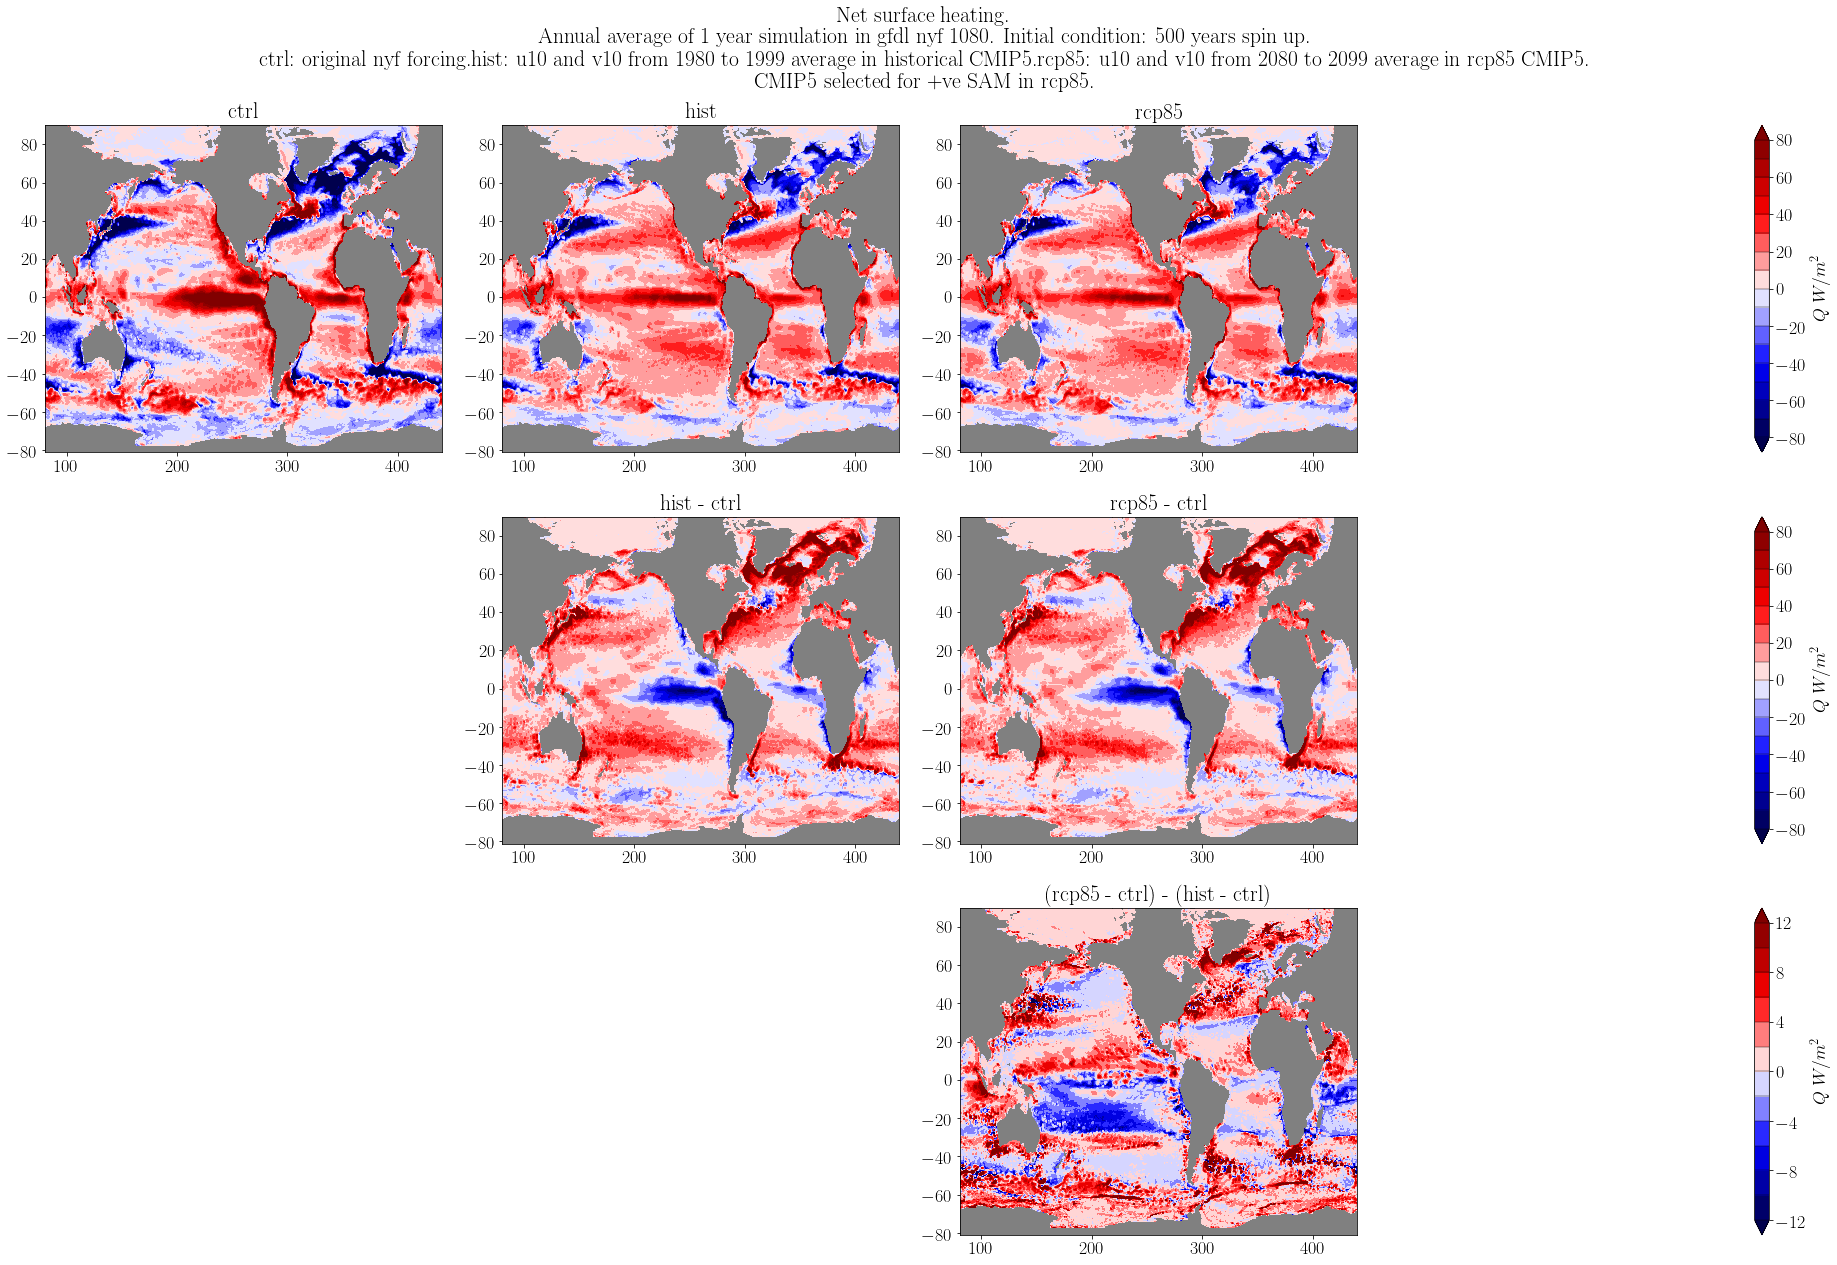

In [51]:
matplotlib.rcParams.update({'font.size': 18}) 
row = 3
col = 4
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(26, 18)

plt.suptitle('Net surface heating.\n'
            + 'Annual average of 1 year simulation in gfdl nyf 1080. Initial condition: 500 years spin up.\n'
            + 'ctrl: original nyf forcing.' 
            + 'hist: u10 and v10 from 1980 to 1999 average in historical CMIP5.'
            + 'rcp85: u10 and v10 from 2080 to 2099 average in rcp85 CMIP5.\n'
            + 'CMIP5 selected for +ve SAM in rcp85.')


lat_phi = yt_ocean(2:end-1);
lon_phi = lon_v;
dx_phi = NaN(length(lat_phi), length(lon_phi)-1);
for ii = 1 : length(lat_phi)
    dx_now = a * cos(lat_phi(ii) * pi180) .* ...
        (lon_phi(2:end) - lon_phi(1:end-1)) * pi180;
    
    dx_phi(ii,:) = dx_now;
end
# % dy for phi position
# lat_phi = lat_u;
# lon_phi = lon_u(2:end-1);
# dy_phi = NaN(length(lat_phi)-1, length(lon_phi));
# for jj = 1 : length(lon_phi)
#     dy_now = a * (lat_phi(1:end-1) - lat_phi(2:end)) * pi180;
    
#     dy_phi(:,jj) = dy_now;
# end

# for t = 1 : 4
#     dtauy = tau_y.(MTH{t})(1:end-1,2:end-1) - tau_y.(MTH{t})(2:end,2:end-1);
#     dx = dx_phi;
#     dtauydx = dtauy./dx;
    
#     dtaux = tau_x.(MTH{t})(2:end-1,2:end) - tau_x.(MTH{t})(2:end-1,1:end-1);
#     dy = dy_phi;
#     dtauxdy = dtaux./dy;
    
#     wind_curl.(MTH{t}) = dtauydx - dtauxdy;
# end


cmap = plt.get_cmap('seismic')
step = 10
contf_lvls = np.arange(-80,80+1e-08,step)  
ax = plt.subplot2grid((row, col), (0, 0))
ax.set_facecolor('grey')
plt.contourf(xt_ocean, yt_ocean, ocean_nsh_ctrl, contf_lvls, cmap=cmap, extend='both')
ax.set_title('ctrl')
ax = plt.subplot2grid((row, col), (0, 1))
ax.set_facecolor('grey')
plt.contourf(xt_ocean, yt_ocean, ocean_nsh_hist, contf_lvls, cmap=cmap, extend='both')
ax.set_title('hist')
ax = plt.subplot2grid((row, col), (0, 2))
ax.set_facecolor('grey')
contf = plt.contourf(xt_ocean, yt_ocean, ocean_nsh_rcp85, contf_lvls, cmap=cmap, extend='both')
ax.set_title('rcp85')
ax = plt.subplot2grid((row, col), (0, 3))
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'$Q$ $W/m^{2}$') 
plt.axis('off')

cmap = plt.get_cmap('seismic')
step = 10
contf_lvls = np.arange(-80,80+1e-08,step)   
# ax = plt.subplot2grid((row, col), (1, 0))
# plt.contourf(ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
ax = plt.subplot2grid((row, col), (1, 1))
ax.set_facecolor('grey')
plt.contourf(xt_ocean, yt_ocean, ocean_nsh_hist - ocean_nsh_ctrl, contf_lvls, cmap=cmap, extend='both')
ax.set_title('hist - ctrl')
ax = plt.subplot2grid((row, col), (1, 2))
ax.set_facecolor('grey')
contf = plt.contourf(xt_ocean, yt_ocean, ocean_nsh_rcp85 - ocean_nsh_ctrl, contf_lvls, cmap=cmap, extend='both')
ax.set_title('rcp85 - ctrl')
ax = plt.subplot2grid((row, col), (1, 3))
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'$Q$ $W/m^{2}$') 
plt.axis('off')

cmap = plt.get_cmap('seismic')
step = 2
contf_lvls = np.arange(-12,12+1e-08,step) 
# ax = plt.subplot2grid((row, col), (1, 0))
# plt.contourf(ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
# ax = plt.subplot2grid((row, col), (1, 1))
# plt.contourf(ice_month_hist_ncra_SST - ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
ax = plt.subplot2grid((row, col), (2, 2))
ax.set_facecolor('grey')
contf = plt.contourf(xt_ocean, yt_ocean, 
    (ocean_nsh_rcp85 - ocean_nsh_ctrl) - (ocean_nsh_hist - ocean_nsh_ctrl), 
    contf_lvls, cmap=cmap, extend='both')
ax.set_title('(rcp85 - ctrl) - (hist - ctrl)')
ax = plt.subplot2grid((row, col), (2, 3))
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'$Q$ $W/m^{2}$') 
plt.axis('off')

fig.tight_layout(rect=[0, 0, 1, 0.92])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig4_' + '.png', bbox_inches='tight', dpi=200)